### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함.
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 균형을 이루어야 함.
- 최적 모델을 위한 cost 함수 구성 요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어
- 비용 함수 목표 = Min(RSS(W) + alpha*|W|)
- 릿지 회귀 : L2 규제 (W의 제곱에 대해 패널티를 부여하는 방식)를 적용한 회귀
- 라쏘 회귀 : L1 규제 (W의 절댓값에 대해 패널티를 부여)

#### 릿지 회귀
#### 라쏘 회귀
- w의 절댓값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것
#### 엘라스틱넷 회귀
- L2 규제와 L1 규제를 결합한 회귀
- 라쏘 회귀가 회귀 계수를 0으로 만드는 성향 떄문에 alpha 에 따라 회귀 계수값이 급격히 변동하는 점을 완화하기 위해 L2규제를 추가함


#### 선형 회귀 모델을 위한 데이터 변환
- 왜곡이 발생할 수 있으므로 데이터에 대한 스케일링 / 정규화 작업을 수행하는 것이 일반적이지만 무조건 예측 성능이 향상되는 것이 아님.
1. standardscaler나 minmaxscaler로 정규화 수행
2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환
3. 원래 값에 log함수를 적용하면 정규 분포에 가까운 형태로 분포함

#### 로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘.
- 회귀의 선형 / 비선형 회귀는 가중치 변수가 선형인지에 따라 다름
- 선형 회귀와의 차이는 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드 함수 최적선을 찾고 시그모이드함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target

bostonDF['CHAS']=bostonDF['CHAS'].astype(np.float64)
bostonDF['RAD']=bostonDF['RAD'].astype(np.float64)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10 으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


- 평균 RMSE가 5.524로 선형 회귀보다 뛰어난 예측 성능

In [8]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0,0.1,1,10,100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge = Ridge(alpha=alpha)

  # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha,avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha 1 일 때 5 folds의 평균 RMSE: 5.653
alpha 10 일 때 5 folds의 평균 RMSE: 5.518
alpha 100 일 때 5 folds의 평균 RMSE: 5.330


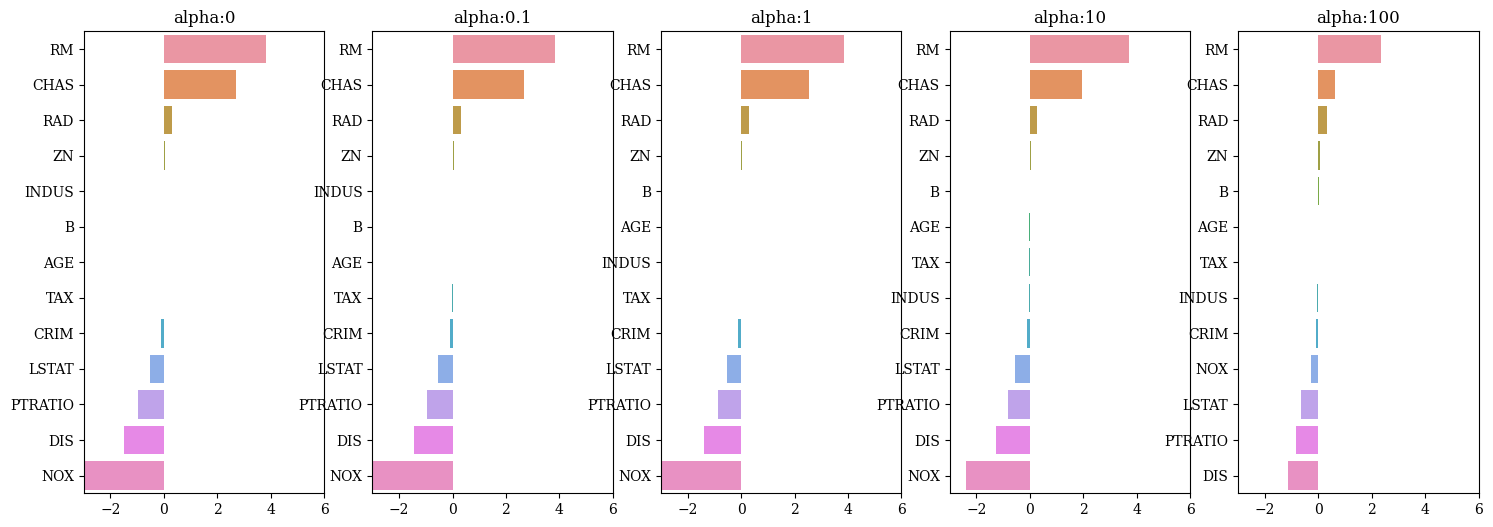

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# 각 alpha에 따른 회귀 계수 값을 시각화 하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)
  # alphs에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname = 'alpha:' + str(alpha)
  coeff_df[colname] = coeff
  # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

- alpha 값을 증가시킬수록 회귀계수값은 지속적으로 작아짐.
  

In [12]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [13]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose : print('###### ', model_name, ' ######')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso': model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(param,avg_rmse))
    #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname = 'alpha:' + str(param)
    coeff_df[colname] = coeff
  return coeff_df
# end of get_linear_reg_eval

In [14]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

######  Lasso  ######
alpha 0.07 일 때 5 folds의 평균 RMSE: 5.612
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.615
alpha 0.5 일 때 5 folds의 평균 RMSE: 5.669
alpha 1 일 때 5 folds의 평균 RMSE: 5.776
alpha 3 일 때 5 folds의 평균 RMSE: 6.189


In [15]:
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [16]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

######  ElasticNet  ######
alpha 0.07 일 때 5 folds의 평균 RMSE: 5.542
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.526
alpha 0.5 일 때 5 folds의 평균 RMSE: 5.467
alpha 1 일 때 5 folds의 평균 RMSE: 5.597
alpha 3 일 때 5 folds의 평균 RMSE: 6.068


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2 이상 부여하지 않음
def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)


  return scaled_data

In [18]:
from re import X
# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환, 먼저 원본 그대로, 표준 정규분포, 표준 정규분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그 변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
  print('\n## 변환 유형: {0}, Polynomial Degree: {1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)
     


## 변환 유형: None, Polynomial Degree: None
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha 1 일 때 5 folds의 평균 RMSE: 5.653
alpha 10 일 때 5 folds의 평균 RMSE: 5.518
alpha 100 일 때 5 folds의 평균 RMSE: 5.330

## 변환 유형: Standard, Polynomial Degree: None
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.826
alpha 1 일 때 5 folds의 평균 RMSE: 5.803
alpha 10 일 때 5 folds의 평균 RMSE: 5.637
alpha 100 일 때 5 folds의 평균 RMSE: 5.421

## 변환 유형: Standard, Polynomial Degree: 2
alpha 0.1 일 때 5 folds의 평균 RMSE: 8.827
alpha 1 일 때 5 folds의 평균 RMSE: 6.871
alpha 10 일 때 5 folds의 평균 RMSE: 5.485
alpha 100 일 때 5 folds의 평균 RMSE: 4.634

## 변환 유형: MinMax, Polynomial Degree: None
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.764
alpha 1 일 때 5 folds의 평균 RMSE: 5.465
alpha 10 일 때 5 folds의 평균 RMSE: 5.754
alpha 100 일 때 5 folds의 평균 RMSE: 7.635

## 변환 유형: MinMax, Polynomial Degree: 2
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.298
alpha 1 일 때 5 folds의 평균 RMSE: 4.323
alpha 10 일 때 5 folds의 평균 RMSE: 5.185
alpha 100 일 때 5 folds의 평균 RMSE: 6.538

## 변환 유형: Log, Polynomial Degree: None
alph

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [20]:
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산이 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [22]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2','l1'], 'C':[0.01, 0.1, 1, 1, 5, 10]}
grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\linear_model\_lo